<font size="6">Введение в графовые сети</font>

# Графовые сети

Когда мы вводили понятие свертки, мы говорили о **связи между соседними пикселями изображения** и **рецептивном поле**, которое увеличивается от слоя к слою. По сути мы использовали информацию о том, что изображение в компьютере хранится в виде определенной структуры — 2D массива (квадратной сетки), в котором каждый элемент (пиксель) задается 3-мя числами (значения цветов).

Существуют данные, в которых структурные элементы (для картинок это пиксели) и связи между ними (для картинок это паттерны, которые мы искали с помощью сверток) **плохо ложатся на квадратную сетку**. Такие данные могут быть представлены в виде графа.

**В первой части** этого обзора мы познакомимся с теорией и попробуем разобраться в том, как в принципе работают операции на графах.

**Во второй части** мы поработаем с готовыми инструментами и напишем свою графовую сеть.

Примеры данных, которые естественно хранить в виде графа:

- Cтруктура молекул (атомы — вершины,  связи между ними — ребра)
- 3D объекты (mesh)
- Транспортные карты и маршруты
- Cвязи: соц. сети, цитаты, цитируемость статей
- и т. п.

<center><img src ="https://ml.gan4x4.ru/msu/dep-2.1/L06/graph_examples.png" width="1000"><center>



<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/galaxy_speed_snapshot.png" width="650"></center>


<center><em>Source: <a href="https://arxiv.org/pdf/2311.00030.pdf">Model Independent Reconstruction of Galaxy Stellar Velocity Map</a></em></center>
    

**Инструменты**

* [PyTorch Geometric 🛠️[doc]](https://pytorch-geometric.readthedocs.io/en/latest/) — основной фреймворк на основе PyTorch, содержит базовые инструменты, реализации отдельных слоёв и сетей целиком со ссылками на публикации.

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/pyg_logo.png" width="400"></center>

<center><em>Source: <a href="https://github.com/pyg-team/pytorch_geometric">PyTorch Geometric library</a></em></center>

* [NetworkX 🛠️[doc]](https://networkx.org/) — инструмент для визуализации графов.



<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/networkx_logo.png" width="500"></center>

<center><em>Source: <a href="https://networkx.org/">NetworkX library</a></em></center>

Конечно, это не единственные инструменты для работы с графами. Так, широко применяется фреймворк [DGL 🛠️[doc]](https://docs.dgl.ai/), который позволяет работать в том числе с TensorFlow.

PyG выигрывает как по наполнению готовыми блоками, так и по совместимости с PyTorch и Lightning. И документация лучше. Есть даже видеоуроки:

* [[doc] 🛠️ PyTorch Geometric Tutorial Project](https://pytorch-geometric.readthedocs.io/en/latest/get_started/colabs.html)

На практике же вам может потребоваться использовать несколько инструментов, комбинируя их. Например, при моделировании атомов (DGL и PyG):
* [[arxiv] 🎓 Towards equilibrium molecular conformation generation with GFlowNets](https://arxiv.org/pdf/2310.14782.pdf)
* [[doc] 🛠️ Python API for the extended tight binding program](https://xtb-python.readthedocs.io/en/latest/index.html)
* [[git] 🐾 Conf-GFlowNet](https://github.com/GFNOrg/conf-gfn)

## Свертки и Сети



Наиболее простой вариант работы с графовыми данными — применение графовых свёрток, которые преобразуют данные в векторное представление, которое далее обрабатывается стандартной свёрточной или полносвязной нейронной сетью.

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/gnn.png" width="600" ></center>

<center><em>Source: <a href="https://www.experoinc.com/expero-resources/node-classification-by-graph-convolutional-network">Node Classification by Graph Convolutional Network</a></em></center>

Второй вариант — применение не только графовых слоёв, но графовой сети целиком, во время обучения которой всё ещё сохраняется графовая структура данных и операции производятся над узлами, связями и подграфами.

В процессе обучения изменяется структура графа: меняются количество и типы связей, появляются и удаляются узлы.

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/gnn_modules.png" width="600" ></center>

<center><em>Source: <a href="https://dasha.ai/en-us/blog/graph-neural-networks">Graph Neural Networks — A Gentle Dive for Machine Learning Beginners</a></em></center>

Во время обучения графовых сетей выделяют две операции:
* агрегирование информации в окрестности узла,
* обновление состояния узла.

Такой подход называется [Message Passing ✏️[blog]](https://thegradient.pub/graph-neural-networks-beyond-message-passing-and-weisfeiler-lehman/).

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/graph_message_passing.png" width="800" ></center>

<center><em>Source: <a href="https://colab.research.google.com/github/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial7/GNN_overview.ipynb#scrollTo=ZFZyLVhBFERn">Tutorial: Graph Neural Networks</a></em></center>

В качестве способа агрегирования можно использовать как взвешенное суммирование векторных представлений узлов, так и [механизм внимания 🛠️[doc]](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.models.GAT.html).

А обновлением может служить перемножение на обучаемую матрицу со слоем активации.

Сегодня же мы не будем подробно останавливаться на Message Passing, а в основном поговорим о графовых свёртках и графовом внимании, узнаем, зачем применять графовые свёртки к картинкам и научимся визуализировать графы.

# Графовые свёртки

##Особенности данных

Рассмотрим не вполне типичный пример — изображения в евклидовом и неевклидовом пространстве. Стандартная свертка (Euclidean CNN) будет по-разному обрабатывать данные в зависимости от типа поверхности, к которой ее применяют. Значит, необходимо придумать что-то, что позволит работать в более сложном, неевклидовом пространстве.

Так мы приходим к созданию геометрических сверток (Geometric CNN).

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/euclidean_and_geometric_cnn.png" width="500" ></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1611.08097.pdf">Geometric deep learning: going beyond Euclidean data</a></em></center>

Свойства **евклидовых данных**:


* Инвариантность к сдвигу (**shift-invariance**): если кот на изображении будет не в верхней левой части, а в правой нижней, то сверточный фильтр все равно сможет определить местоположение кота. Чуть более формально: это свойство данных позволяет применять один и тот же оператор на всех частях данных.
* Локализованность данных (**locality**): группа близлежащих частей данных скорее всего отвечает за определенный объект (в случае кота это может быть группа пикселей, отвечающих за уши или хвост). Формально, это позволяет применять свертки относительно небольшого размера для того, чтобы локализовать объект на изображениях .
* Иерархичность данных (**compositionality or hierarchy**): крупномасштабные и мелкомасштабные структуры внутри одного объекта данных, скорее всего, семантически связаны отношением “является составной частью” (кот состоит из ушей, лап и хвоста и т.д.).

**Для графов эти свойства, увы, обычно не выполняются**.

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/digit_graph.png" width="500" ></center>

<center><em>Source: <a href="https://habr.com/ru/companies/itmai/articles/533746/">Свертки на графах</a></em></center>

Создавать такие визуализации нам поможет библиотека [NetworkX ✏️[blog]](https://habr.com/ru/articles/125898/).

Нарисуем случайный граф размером 2×3×3.

In [ ]:
# Install PyTorch Geometric
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


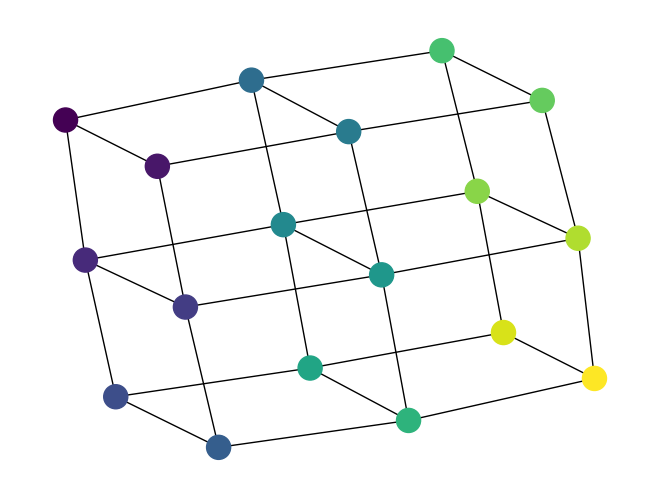

In [ ]:
import networkx as nx

G = nx.grid_graph([2, 3, 3])
colors = [i/len(G.nodes) for i in range(len(G.nodes))]
nx.draw(G, node_color=colors)

Но полезнее показать код более серьёзных визуализаций, который вы сможете адаптировать под свои данные. Например, [суперпиксели для MNIST 🎓[arxiv]](https://arxiv.org/abs/1611.08402).

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt


def visualize(image, data):
    plt.figure(figsize=(17, 8))

    # plot the mnist image
    plt.subplot(1, 2, 1)
    plt.title("MNIST")
    np_image = np.array(image)
    plt.imshow(np_image)

    # plot the super-pixel graph
    plt.subplot(1, 2, 2)
    x, edge_index = data.x, data.edge_index

    # construct networkx graph
    df = pd.DataFrame({"from": edge_index[0], "to": edge_index[1]})
    G = nx.from_pandas_edgelist(df, "from", "to")

    # flip over the axis of pos, this is because the default axis direction of networkx is different
    pos = {i: np.array([data.pos[i][0], 27 - data.pos[i][1]]) for i in range(data.num_nodes)}

    # get the current node index of G
    idx = list(G.nodes())

    # set the node sizes using node features
    size = x[idx] * 500 + 200

    # set the node colors using node features
    color = []
    for i in idx:
        grey = x[i]
        if grey == 0:
            color.append("skyblue")
        else:
            color.append("red")

    nx.draw(G, with_labels=True, node_size=size, node_color=color, pos=pos)
    plt.title("MNIST Superpixel")

Image Label: 2


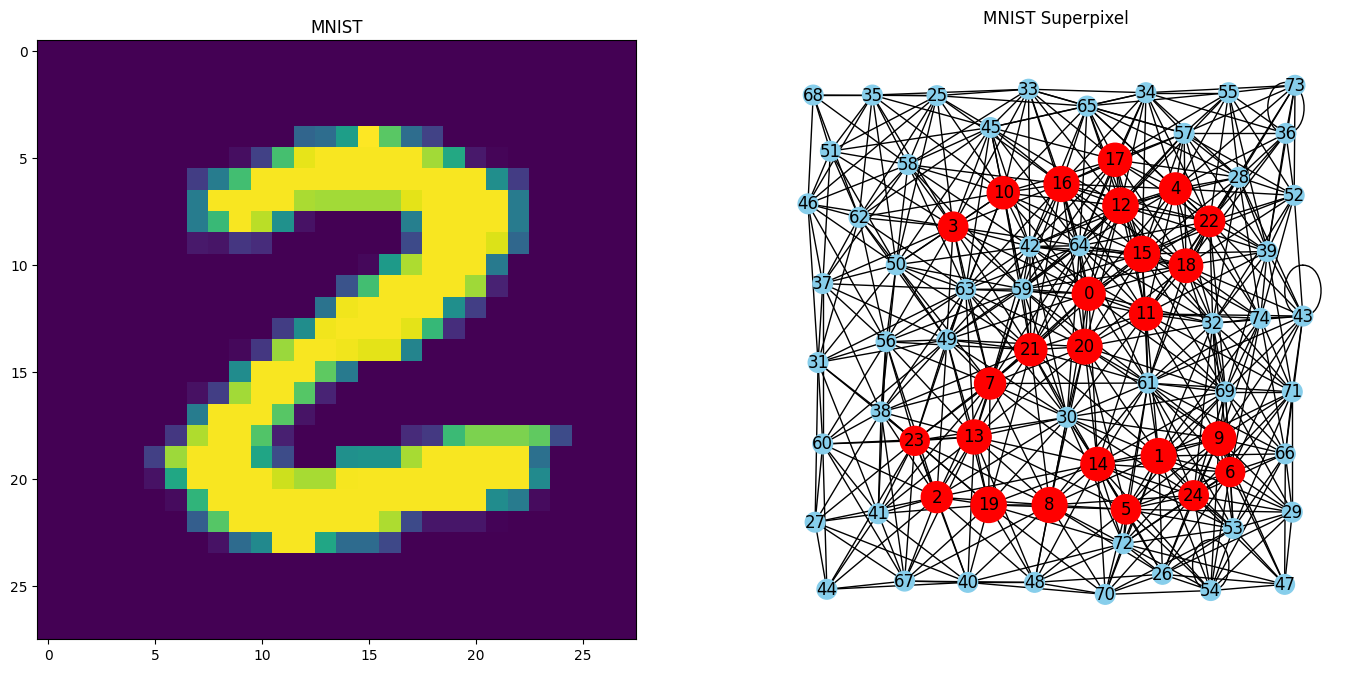

In [ ]:
from torchvision.datasets import MNIST
from torch_geometric.datasets import MNISTSuperpixels
from IPython.display import clear_output

image_dataset = MNIST(root="", download=True)
graph_dataset = MNISTSuperpixels(root="")
clear_output()

example = 25
image, label = image_dataset[example]
data = graph_dataset[example]
print("Image Label:", label)
visualize(image, data)

##Представление данных

Если у нас есть регулярная сетка, то, развивая эти идеи, можно было бы адаптировать имеющиеся классические свёртки к данным в виде графа.

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/graph_conv.png" width="700"></center>

<center><em>Две последовательные итерации свёртки</em></center>

<center><em>Source: <a href="https://habr.com/ru/companies/itmai/articles/533746/">Свертки на графах</a></em></center>

К сожалению, редко когда такое срабатывает. Скалярное произведение, которое используется в классических свёртках, чувствительно к порядку узлов. Проблема в том, что в графах нет чётко заданного порядка узлов, и любая перестановка узлов не изменяет граф.

Таким образом, применяемые операции должны быть инварианты к перестановке. Наиболее популярными вариантами являются [усреднение 🎓[arxiv]](https://arxiv.org/abs/1609.02907) и [суммирование 🎓[arxiv]](https://arxiv.org/abs/1810.00826) всех соседей, т.е. объединение сумм или средних с последующим проецированием с помощью обучаемого вектора $W$.

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/irregular_graph.png" width="600" ></center>

<center><em>Графовая свёртка с фильтром $W_1$ для узла $X_1$</em></center>

<center><em>Source: <a href="https://habr.com/ru/companies/itmai/articles/533746/">Свертки на графах</a></em></center>

Тогда проход свёрткой по левому графу будет выглядеть так:

$$\large \hat{X_1} = (X_1+X_2+X_3+X_4) \times W_1$$
$$\large \hat{X_2} = (X_1+X_2+X_3+X_5) \times W_1$$
$$\large \hat{X_3} = (X_1+X_2+X_3+X_5) \times W_1$$
$$\large \hat{X_4} = (X_1) \times W_1$$
$$\large \hat{X_5} = (X_2+X_3) \times W_1$$

Для описания подобной графовой структуры можно воспользоваться **матрицей смежности**. Ниже приведен пример неориентированного графа и его матрицы. Обратите внимание, что различные варианты нумерации вершин графа приводят к различным матрицам смежности.

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/adjacency_matrix.png" width="1000" ></center>

<center><em>Source: <a href="https://habr.com/ru/companies/itmai/articles/533746/">Свертки на графах</a></em></center>

Матрица `dist` — матрица смежности для полносвязного графа с $28^2$ вершинами, матрица $A$ — матрица смежности с учетом пространственной близости (здесь используется эвристическое соображение о том, что близлежащие пиксели должны сильнее коррелировать друг с другом, чем те, которые лежат на расстоянии). Этот способ определять матрицы смежности для задач, связанных с обработкой изображений, — популярный, но не единственный.

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist


img_size = 28  # MNIST image width and height
col, row = np.meshgrid(np.arange(img_size), np.arange(img_size))
coord = np.stack((col, row), axis=2).reshape(-1, 2) / img_size
dist = cdist(coord, coord)  #(левое изображение)
sigma = 0.2 * np.pi  # width of a Gaussian
A = np.exp(-dist ** 2 / sigma ** 2) #(изображение в центре)

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/adj_matrix_example.png" width="900" ></center>

<center><em>Source: <a href="https://habr.com/ru/companies/itmai/articles/533746/">Свертки на графах</a></em></center>

Теперь, на основе матрицы смежности $A$, мы сможем сконструировать т.н. нормированную матрицу смежности $\mathcal{A}$. Ее можно создать различными способами, но два наиболее популярных подхода следующие:


* $\mathcal{A} = A$, и тогда матричное умножение $\mathcal{A} X^{(l)}$ эквивалентно суммированию признаков по соседним вершинам;
* $\mathcal{A} = \dfrac{A}{\|A\|}$, и тогда матричное умножение $\mathcal{A} X^{(l)}$ эквивалентно усреднению признаков по соседним вершинам.

В итоге, после выбора способа нормализации матрицы смежности, мы сможем сконструировать линейный полносвязный слой вида:


$$X^{(l+1)} = \mathcal{A} X^{(l)} W^{(l)}. $$

Если к результату матричного умножения в правой части применить нелинейную функции активации, то мы сконструируем нелинейный полносвязный слой.

Разница в реализации обычного полносвязного слоя и полносвязного слоя с графовой сверткой:

In [ ]:
import torch
import torch.nn as nn

C = 2  # Input feature dimensionality
F = 8  # Output feature dimensionality
N = 6  # Number of nodes in a graph
X = torch.randn(N, C)  # Input features

# Fully connected layer
W = nn.Linear(in_features=C, out_features=F)  # Trainable weights
Z = W(X)  # Output features : torch.Size([6, 8])
print ("Linear:", Z.shape)

#Graph Neural Network layer
A = torch.rand(N, N)  # Adjacency matrix (edges of a graph)
Z = W(torch.mm(A, X))  # Output features: torch.Size([6, 8])

print ("Graph: ", Z.shape)

Linear: torch.Size([6, 8])
Graph:  torch.Size([6, 8])


При сохранении размерностей здесь производятся различные операции над данными.

**Наcколько лучше мы теперь можем решать задачи с помощью графового слоя?**

На самом деле мы продвинулись несильно. В конце раздела приведён полный код примера с обучением на MNIST (в котором перемешаны пиксели), и точность в обеих моделях эквивалента.

По факту мы реализовали что-то близкое к Гауссову фильтру в $\mathcal{A} X^{(l)}$.   

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/gauss.jpg" width="500" ></center>

<center><em>Фильтр Гаусса, выученный графовой сетью, и результат его применения к изображению</em></center>

<center><em>Source: <a href="https://habr.com/ru/companies/itmai/articles/533746/">Свертки на графах</a></em></center>

Собственно, сейчас мы получили ровно тот же результат, что и с классическими нейронными сетями. **Сложность модели должна соответствовать сложности данных.** Грубо говоря, мы применили полносвязную нейросеть к картинкам.

Для того, чтобы решать подобные задачи, сеть необходимо усложнить. Ниже мы посмотрим уже непосредственно на свёртки, а здесь вам может быть интересно, как в имеющуюся нейросеть добавили ещё одну нейросеть, чтобы на графах предсказывать границы между пикселями, тем самым [добившись 92+\% точности 🎓[arxiv]](https://arxiv.org/pdf/1907.09000.pdf).

[[git] 🐾 Полный код примера](https://github.com/bknyaz/examples/blob/master/fc_vs_graph_train.py)

# PyTorch Geometric

Давайте посмотрим, как использовать готовые слои графовых сетей. Но вначале нужно разобраться, в каком виде представляются данные в фреймворке PyG.

Установим пакет [PyTorch Geometric 🛠️[doc]](https://pytorch-geometric.readthedocs.io/en/latest/).


In [ ]:
!pip install -q torch_geometric --progress-bar off

Создадим простой граф для демонстрации.
Сначала создаем список вершин. Для простоты каждая вершина будет содержать одно число, но в общем случае вершина может содержать любую информацию в виде вектора чисел. Размер эмбеддингов у всех вершин графа должен совпадать.

In [ ]:
import torch

x = torch.tensor([[0], [1], [2], [3], [4], [5]], dtype=torch.float)

Ребра между вершинами можно задать:

* в виде матрицы смежности ([adjacency matrix 📚[wiki]](https://en.wikipedia.org/wiki/Adjacency_matrix));
* в виде списка пар вершин, между которыми есть ребра ([COO 🛠️[doc]](https://pytorch-geometric.readthedocs.io/en/latest/get_started/introduction.html)).

Второй способ компактнее, воспользуемся им. Число в первой строке — это **номер** исходящей вершины, число во второй (с тем же индексом) — номер входящей.

In [ ]:
# fmt: off
edge_index = torch.tensor([[0, 1,  2, 2, 3, 4, 4],
                           [1, 2,  3, 4, 5, 2, 5]], dtype=torch.long)
# fmt: on

В PyTorch Geometric для работы с графами используется класс `Data` [🛠️[doc]](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.data.Data.html#torch_geometric.data.Data). Инициализируем экземпляр этого класса списком вершин и ребер.

In [ ]:
from torch_geometric.data import Data

data = Data(x=x, edge_index=edge_index)
data.validate(raise_on_error=True)  # optional check

True

Вообще, простейший граф обладает следующими атрибутами:

* **`data.x`**: узлы в виде матрицы размером  `[num_nodes, num_node_features]`

* **`data.edge_index`**: рёбра графа, пары вершин в формате COO размером `[2, num_edges]` и обязательно типом `torch.long`

* **`data.edge_attr`**: признаки ребёр, матрица размером `[num_edges, num_edge_features]`

* **`data.y`**: метки узлов (`[num_nodes, *]`) или графа целиком ([1, *])

* **`data.pos`**: расположение узлов, матрица размером `[num_nodes, num_dimensions]`

Ни один из них не является обязательным, и граф может быть создан и из полигонального объекта через `torch_geometric.transforms.face_to_edge`.

### Визуализация графа

Для визуализации созданного графа используем  пакет [NetworkX 🛠️[doc]](https://networkx.org/).
Он совместим с [PyTorch Geometric 🛠️[doc]](https://pytorch-geometric.readthedocs.io/en/latest/).

[[doc] 🛠️ Drawing — basic functionality for visualizing graphs](https://networkx.org/documentation/networkx-1.10/reference/drawing.html)

Нам понадобится код для визуализации, поэтому поместим его в функцию:

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
from networkx.drawing.layout import kamada_kawai_layout


def show_graph(graph, colors=None, embeddings=False):
    fs = 14
    int2label = {}
    g = to_networkx(graph, to_undirected=False)  #
    if embeddings:
        for i, e in enumerate(graph.x):
            str_emb = ["{0:0.1f}".format(p.item()) for p in e]
            int2label[i] = f"{i}: [" + ",".join(str_emb) + "]"
        g = nx.relabel_nodes(g, int2label)
        fs = 10

    plt.axis("off")

    nx.draw_networkx(
        g,
        pos=kamada_kawai_layout(
            g, dim=2, scale=1, center=None
        ),  # nx.spring_layout(G, seed=0),
        with_labels=True,
        node_size=800,
        node_color=colors,  # data.y, for clustering
        edge_color="grey",
        font_size=fs,
    )

### GCNConv

Разберем классический алгоритм свёртки из статьи [Semi-Supervised Classification with Graph Convolutional Networks 🎓[arxiv]](https://arxiv.org/abs/1609.02907).

[[doc] 🛠️ GNN Cheatsheet](https://pytorch-geometric.readthedocs.io/en/latest/notes/cheatsheet.html)





<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/gcn_scheme.png" width="800"></center>

На выходе графового сверточного слоя получаются новые эмбеддинги для всех вершин.
Новый эмбеддинг считается как взвешенная сумма скалярных произведений эмбеддингов соседних вершин на матрицу весов.


Это напоминает свертку $1\times1$ для изображений с последующей субдискретизацией (pooling). Основное отличие в том, что **количество соседей** у разных вершин может отличаться, и в сумме будет получаться разное количество слагаемых. Поэтому необходимо их взвесить (множители $d_i$ на картинке.). Если все $d_i = 1$, то графовая свертка вычисляется по той же формуле:

$$\large y_i = \sum_{i \in N}  x_i*W,$$

где $N$ — множество номеров соседей $i$-той вершины,

$x_i$ — эмбеддинг $i$-той вершины,

$W$ — матрица весов, **одна для всех вершин**.

Вот как выглядят соседи каждой вершины, которые будут участвовать в свертках. **Соседняя вершина — эта та, из которой есть путь в рассматриваемую**.

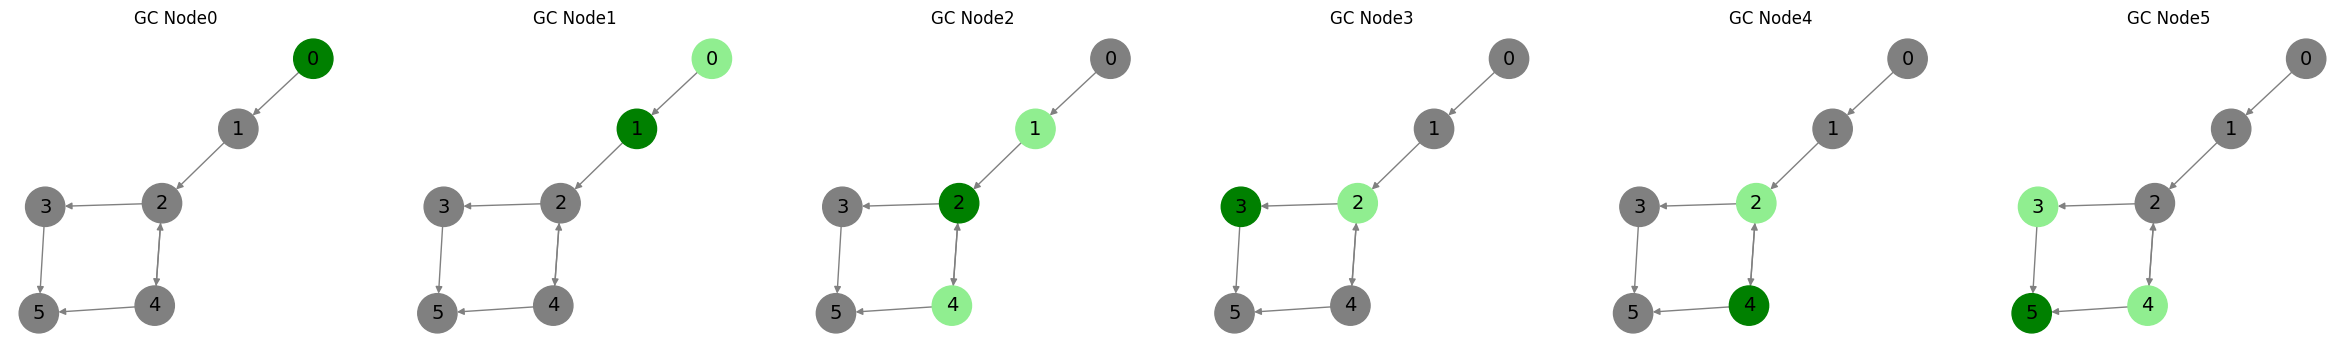

In [ ]:
plt.figure(figsize=(30, 4))
plt.subplot(1, 6, 1).set_title("GC Node0")
show_graph(data, ["green", "gray", "gray", "gray", "gray", "gray"])
plt.subplot(1, 6, 2).set_title("GC Node1")
show_graph(data, ["lightgreen", "green", "gray", "gray", "gray", "gray"])
plt.subplot(1, 6, 3).set_title("GC Node2")
show_graph(data, ["gray", "lightgreen", "green", "gray", "lightgreen", "gray"])
plt.subplot(1, 6, 4).set_title("GC Node3")
show_graph(data, ["gray", "gray", "lightgreen", "green", "gray", "gray"])
plt.subplot(1, 6, 5).set_title("GC Node4")
show_graph(data, ["gray", "gray", "lightgreen", "gray", "green", "gray"])
plt.subplot(1, 6, 6).set_title("GC Node5")
show_graph(data, ["gray", "gray", "gray", "lightgreen", "lightgreen", "green"])

В PyTorch Geometric графовый сверточный слой реализуется классом `GCNConv` [🛠️[doc]](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.conv.GCNConv.html#torch_geometric.nn.conv.GCNConv):

In [ ]:
from torch_geometric.nn import GCNConv

gcn = GCNConv(in_channels=1, out_channels=3)
print(gcn)

GCNConv(1, 3)


`in_channels` — это размерность эмбеддинга вершины на входе, а `out_channels` — на выходе.

In [ ]:
for name, p in gcn.named_parameters():
    print(name, p.shape)

bias torch.Size([3])
lin.weight torch.Size([3, 1])


Фактически `out_channels` — это количество столбцов в матрице $W$.

Посмотрим, как работает слой.

Поскольку нам нужны эмбеддинги, заменим значения $x$, которые были просто равны номеру вершины, на `one_hot` векторы:

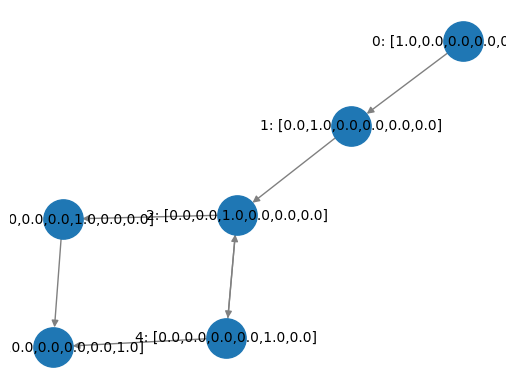

In [ ]:
from torch.nn.functional import one_hot

embeddings = one_hot(x.flatten().long()).float()
data = Data(x=embeddings, edge_index=edge_index)
data.validate(raise_on_error=True)

show_graph(data, embeddings=True)

In [ ]:
print(embeddings)

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])


Создадим графовую свертку с одним нейроном.
Для начала отключим все дополнительные опции и инициализируем веса единицами, чтобы было проще понять, как она работает.

In [ ]:
gcn = GCNConv(len(x), 1, add_self_loops=False, bias=False, normalize=False)
gcn.lin.weight.data = torch.ones((1, len(x)))
print(gcn, " weights ", gcn.lin.weight)

GCNConv(6, 1)  weights  Parameter containing:
tensor([[1., 1., 1., 1., 1., 1.]], requires_grad=True)


In [ ]:
out = gcn(embeddings, edge_index)
print(out)  # Embedding (dim=1) for every node from 0 ... 5

tensor([[0.],
        [1.],
        [2.],
        [1.],
        [1.],
        [2.]], grad_fn=<ScatterAddBackward0>)


Эта операция соответствует перемножению эмбеддингов вершин на веса  и сумму по всем соседям:

$$\large y_i = \sum_{j \in N_i} \bar x_j \cdot \bar w,$$

$N_i$ — это множество соседей $i$-й вершины, соседи — это  вершины, **из которых есть путь в текущую**.



Проделаем ее самостоятельно.
Эмбеддинг каждой вершины умножается на одну и ту же матрицу весов:

In [ ]:
y = embeddings @ gcn.lin.weight.data.T
print(y)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


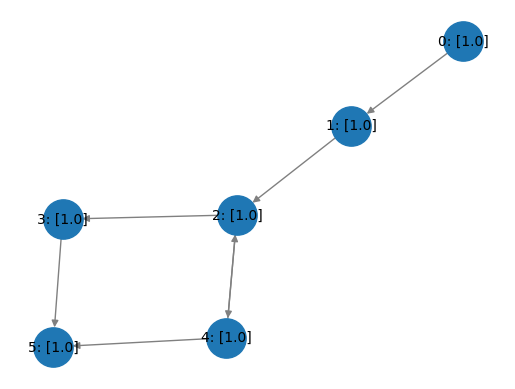

In [ ]:
show_graph(Data(x=y, edge_index=edge_index), embeddings=True)

Полученные после перемножения результы суммируются для соседей каждой вершины.

В PyTorch Geometric эта операция реализуется пакетом `torch_scatter` [🛠️[doc]](https://pytorch-scatter.readthedocs.io/en/latest/functions/scatter.html).

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/scatter.png" width="600"></center>

In [ ]:
oc = torch.zeros_like(y)  # out custom

oc[0] = 0  # no nighbors
oc[1] = y[0]  # one neighbor (#0)
oc[2] = y[1] + y[4]
oc[3] = y[2]
oc[4] = y[2]
oc[5] = y[3] + y[4]

print(oc)

assert torch.allclose(out, oc)

tensor([[0.],
        [1.],
        [2.],
        [1.],
        [1.],
        [2.]])


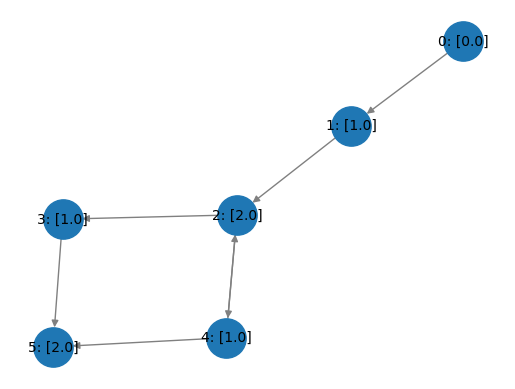

In [ ]:
show_graph(Data(x=oc, edge_index=edge_index), embeddings=True)

**Улучшения**

1. Логично добавлять к сумме эмбеддинг самой вершины.
Для этого нужно либо в `edge_index` добавить к каждой вершине путь в саму себя, либо установить в конструкторе `GCNConv` параметр `add_self_loops = True`, тогда
$x_i \in N_i$.

2. Число соседей у разных вершин может сильно отличаться, и результат графовой свертки для вершины с одним соседом по абсолютному значению будет сильно меньше, чем для вершины, у которой $200$ соседей. Поэтому логично нормировать выходы на количество слагаемых (число соседей вершины). Количество соседей вершины обозначим как : $\text{deg}(i) = d_i$, тогда:

$$\large y_i = \frac{1}{d_i} \sum_{j \in N_i} \bar x_j \cdot \bar w  \quad (2)$$

3. Авторы статьи [Semi-Supervised Classification with Graph Convolutional Networks (Kipf, Welling, 2017) 🎓[arxiv]](https://arxiv.org/abs/1609.02907) предположили, что признаки от узлов с многочисленными соседями будут распространяться легче, чем от изолированных узлов. Чтобы компенсировать этот эффект, они  предложили присваивать больший вес признакам из узлов с меньшим числом соседей:

$$\large y_i =   \frac{1}{ \sqrt{d_i}} \sum_{j \in N_i} \frac {\bar x_j \cdot \bar w} {\sqrt{d_j}} = \sum_{j \in N_i} \frac  {\bar x_j \cdot \bar w} {\sqrt {d_i d_j}  } \quad(3)$$

  Чтобы порядок значений сохранялся, добавили корень. Теперь при $d_i == d_j$ значения $(2)$ и $(3)$ будут равны.

  4. У ребер могут быть собственные веса, задающие силу связи между вершинами. Их можно добавить при прямом проходе, используя параметр `edge_weight` метода `GCNConv.forward`. По умолчанию эти веса равны $1$, обозначим их как $e_{j,i}$ .
  
  Ослабление или усиление связи между вершинами означает изменение степени соседства. Поэтому $\displaystyle d_i = 1+\sum_{j \in N_i} e_{j,i} $, и общая формула примет вид:

  $$\large y_i = \sum_{j \in N_i} \frac  { e_{j,i} \bar x_j \cdot \bar w} {\sqrt {d_i d_j}  } \quad(4)$$




Чтобы добавить нормировки на количество соседей, надо установить `normalize=True`. Без установки `normalized=True` установка `add_self_loops=True` работает некорректно.

In [ ]:
gcn = GCNConv(len(x), 1, add_self_loops=True, bias=False, normalize=True)
gcn.lin.weight.data = torch.ones((1, len(x)))
out = gcn(embeddings, edge_index)
print(out)

tensor([[1.0000],
        [1.2071],
        [1.1498],
        [0.9082],
        [0.9082],
        [1.1498]], grad_fn=<ScatterAddBackward0>)


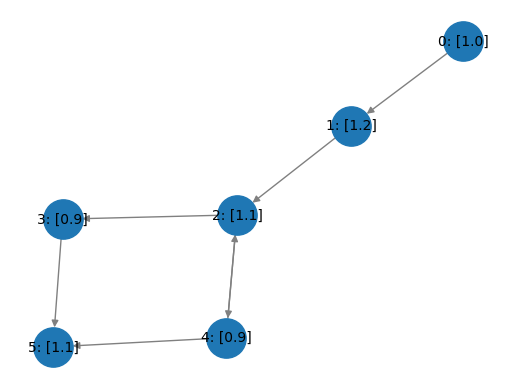

In [ ]:
show_graph(Data(x=out, edge_index=edge_index), embeddings=True)

В коде это могло бы выглядеть примерно так:

In [ ]:
from math import sqrt


def get_neighbors(n):
    # find all neighbors of node n
    neighbors = [n]  # first put to neighbors list index of node itself
    for i, node_num in enumerate(edge_index[1]):
        if node_num == n:
            neighbors.append(edge_index[0][i].item())
    return neighbors


out_norm = torch.zeros_like(out)  # final summ
for i, e in enumerate(y):
    neighbors = get_neighbors(i)
    deg_i = len(neighbors)  # neighbors count of node i
    for node_num in neighbors:
        deg_j = len(
            get_neighbors(node_num)
        )  # neighbors count of j-th neighbor of node i
        out_norm[i] += y[node_num] / (
            sqrt(deg_i) * sqrt(deg_j)
        )  # Implementation of  equation (3)
print(out_norm)
assert torch.allclose(out, out_norm)  # check that results of CGNConv the same

tensor([[1.0000],
        [1.2071],
        [1.1498],
        [0.9082],
        [0.9082],
        [1.1498]])


Добавление весов к ребрам:

In [ ]:
print(edge_index)

tensor([[0, 1, 2, 2, 3, 4, 4],
        [1, 2, 3, 4, 5, 2, 5]])


['1.00', '1.21', '1.15', '0.91', '0.91', '3.21']


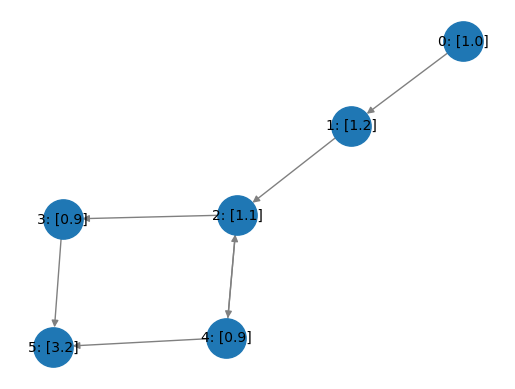

In [ ]:
edge_weight = torch.Tensor([1, 1, 1, 1, 1, 1, 20])  # increase 4->5 edge weight

out = gcn(embeddings, edge_index, edge_weight)
print(["{0:0.2f}".format(i.item()) for i in out])
show_graph(Data(x=out, edge_index=edge_index), embeddings=True)

Если мы добавим в слой ещё нейроны, то размерность эмбеддингов на выходе увеличится:

In [ ]:
gcn = GCNConv(len(x), 8, add_self_loops=True, bias=False, normalize=True)
out = gcn(embeddings, edge_index)

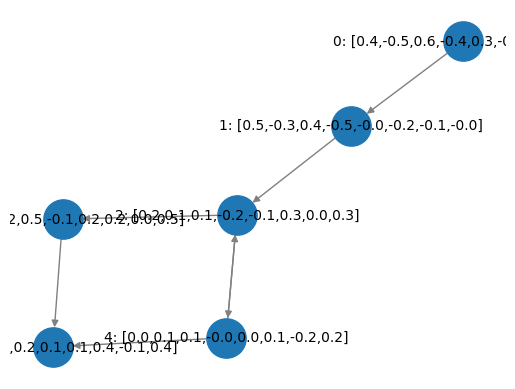

In [ ]:
show_graph(Data(x=out, edge_index=edge_index), embeddings=True)

Это имеет смысл, так как эмбеддинг должен вобрать в себя информацию о соседних вершинах, и, чтобы закодировать ее, требуется место. А если мы объединим несколько слоев вместе, то можем добиться того, что каждый эмбеддинг сможет содержать информацию о всех доступных вершинах.

In [ ]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn1 = GCNConv(6, 8)
        self.gcn2 = GCNConv(8, 16)

    def forward(self, x, edge_index, batch_index=None):
        x = self.gcn1(x, edge_index).relu()
        return self.gcn2(x, edge_index)

In [ ]:
model = GCN()
print(model)

GCN(
  (gcn1): GCNConv(6, 8)
  (gcn2): GCNConv(8, 16)
)


In [ ]:
out = model(embeddings, edge_index)
print(out.shape)
# show_graph(Data(x = out, edge_index=edge_index), embeddings =True)

torch.Size([6, 16])


С каждым слоем количество соседей, которое участвует в получении эмбеддинга вершины, будет расти. Можно сравнить это с увеличением рецептивного поля нейрона в обычной сверточной сети. Вот пример того, как будет расти рецептивное поле 3-й вершины с увеличением числа слоев:

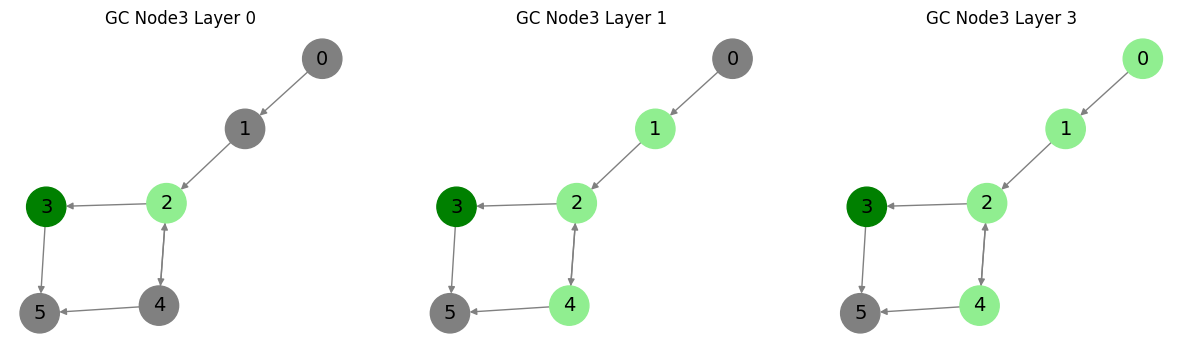

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1).set_title("GC Node3 Layer 0")
show_graph(data, ["gray", "gray", "lightgreen", "green", "gray", "gray"])
plt.subplot(1, 3, 2).set_title("GC Node3 Layer 1")
show_graph(data, ["gray", "lightgreen", "lightgreen", "green", "lightgreen", "gray"])
plt.subplot(1, 3, 3).set_title("GC Node3 Layer 3")
show_graph(
    data, ["lightgreen", "lightgreen", "lightgreen", "green", "lightgreen", "gray"]
)

На выходе CGNConv слоя мы получаем граф с новыми эмбеддингами. Его можно использовать для решения ряда задач:

* предсказывать класс для каждой из вершин;
* кластеризовать вершины;
* классифицировать граф целиком, для этого агрегируют эмбеддинги всех вершин и получившийся эмбеддинг подают на вход классификатору;
* предсказывать свойства всего графа, решая задачу регрессии.

## Attention на графах

Смысл механизма внимания на графах схож с классическим вниманием для рекуррентных сетей и трансформеров.

Операция обновления узла обычно выглядит как усреднённый вклад от всех соседей. Механизм внимания вычисляет для каждого соседа некоторый весовой коэффициент. Здесь также используется самовнимание, с помощью которого вычисляются попарные веса между каждой парой узлов. Эти веса, помимо прочего, могут быть полезны для "вскрытия чёрного ящика" — для интерпретации работы графовой нейросети.

<center><img src ="https://ml.gan4x4.ru/msu/additions/GNN/attention_graph.png" width="500"></center>

<center><em>Механизм самовнимания для двух векторных представлений узлов</em></center>

<center><em>Source: <a href="https://habr.com/ru/companies/skillfactory/articles/661933/">Введение в графовые нейросети с механизмом самовнимания на примере PyTorch Geometric</a></em></center>

Здесь, следуя работа [Veličković et al. 🎓[arxiv]](https://arxiv.org/abs/1710.10903), применяется небольшая нейросеть для расчёта весов внимания, состоящая из полносвязного слоя $Watt$, активации $\text{LeakyReLU}$ и слоя $\text{Softmax}$. На рисунке выше $W$ — общая весовая матрица, векторные представления сконкатенированы для перемножения на $Watt$.

Оператор внимания для графов **`GATConv`** (graph attentional operator) реализован в [PyG 🛠️[doc]](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.conv.GATConv.html):

$$x_{i}^{'} = a_{i,i}Wx_{i} + \sum_{jϵN(i)}a_{i,j}Wx_{j},$$

где веса внимания $a_{i,j}$:

\begin{align}\begin{aligned}\alpha_{i,j} &=
\frac{
\exp\left(\mathrm{LeakyReLU}\left(a_s^TWx_i+a_t^TWx_j\right)\right)}
{\sum_{k \in \mathcal{N}(i) \cup \{ i \}}
\exp\left(\mathrm{LeakyReLU}\left(a_s^TWx_i+a_t^TWx_k\right)\right)}.\end{aligned}\end{align}

In [ ]:
from torch_geometric.nn import GATConv

gat = GATConv(len(x), 8, add_self_loops=True, bias=False, heads=3, dropout=0.6)
out = gat(embeddings, edge_index)

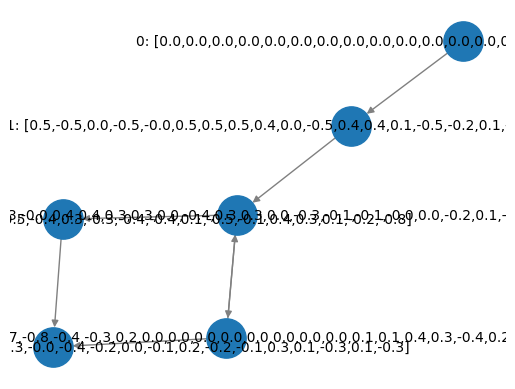

In [ ]:
show_graph(Data(x=out, edge_index=edge_index), embeddings=True)

Теперь рассмотрим, как это можно применить на датасете Planetoid, состоящем из 2708 публикаций, разделенных на 7 классов.

##Графовая нейросеть

In [ ]:
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid

dataset = "Cora"
dataset = Planetoid("", name = dataset,transform=T.NormalizeFeatures())

Processing...
Done!


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = dataset[0].to(device)

Что есть в датасете?

In [ ]:
# Print information
print(dataset)
print("------------")
print(f"Number of graphs: {len(dataset)}")
print(f"Number of features: {dataset.num_features}")
print(f"Number of classes: {dataset.num_classes}")

Cora()
------------
Number of graphs: 1
Number of features: 1433
Number of classes: 7


Каждая публикация в датасете описывается вектором из 0 и 1, сообщающим, есть ли в публикации слово из словаря размером 1433 уникальных слова. Посмотрим на размеры объектов.

In [ ]:
# Print first element
print(f"Graph: {dataset[0]}")

Graph: Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [ ]:
data = dataset[0]

print(f"x = {data.x.shape}")

x = torch.Size([2708, 1433])


Количество цитат в датасете Cora равно **5429**, что отражено в рёбрах графа.

In [ ]:
print(f"edge_index = {data.edge_index.shape}")
print(data.edge_index)

edge_index = torch.Size([2, 10556])
tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])


Количество связей равно **10556**, то есть в два раза больше количества цитат. Почему так?

In [ ]:
print(f"Has isolated nodes: {data.has_isolated_nodes()}")  # False
print(f"Has self-loops: {data.has_self_loops()}")  # False
print(f"Is undirected: {data.is_undirected()}")  # True

Has isolated nodes: False
Has self-loops: False
Is undirected: True


Первая строка кода подтверждает, что нет узлов, не соединенных ребрами, вторая строка кода показывает, что нет циклов, а третья строка кода показывает, что ребра не являются направленными. Это означает, что количество ребер в два раза превышает фактическое количество из-за включенной двунаправленной информации о ребрах.

Посмотрим, как хранится информация о рёбрах.

In [ ]:
edge_index = data.edge_index.numpy()
print(edge_index.shape)
edge_example = edge_index[:, np.where(edge_index[0]==30)[0]]
edge_example

(2, 10556)


array([[  30,   30,   30,   30,   30,   30],
       [ 697,  738, 1358, 1416, 2162, 2343]])

Данные записаны в виде пар узлов, соединённых ребрами.

In [ ]:
print(f"y = {data.y.shape}")
print(data.y)

y = torch.Size([2708])
tensor([3, 4, 4,  ..., 3, 3, 3])


Здесь в маске указывается, какие данные использовать для обучения модели.

In [ ]:
print(f"train_mask = {data.train_mask.shape}")
print(data.train_mask)

train_mask = torch.Size([2708])
tensor([ True,  True,  True,  ..., False, False, False])


Визуализируем отдельный узел.

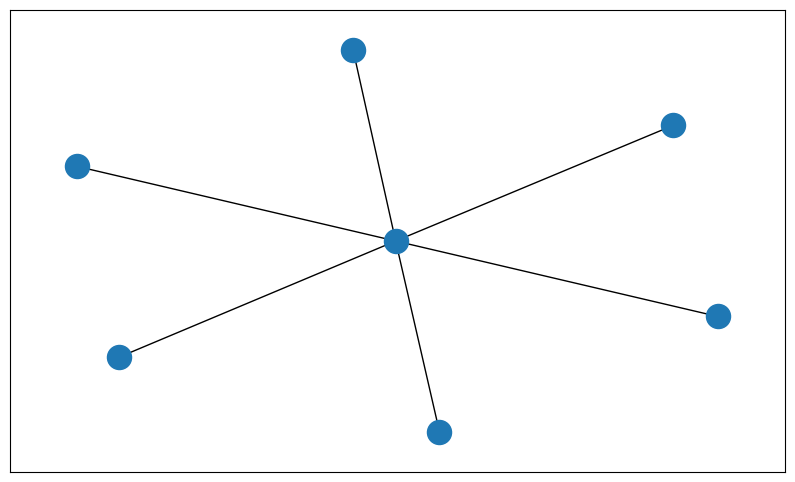

In [ ]:
node_example = np.unique(edge_example.flatten())
plt.figure(figsize=(10, 6))
G = nx.Graph()
G.add_nodes_from(node_example)
G.add_edges_from(list(zip(edge_example[0], edge_example[1])))
nx.draw_networkx(G, with_labels=False)

Итак, у этой публикации 6 цитат. А как обстоят дела в целом по датасету?

In [ ]:
print(f"Average node degree: {data.num_edges / data.num_nodes:.2f}")

Average node degree: 3.90


Давайте посмотрим на распределение цитирования с помощью гистограммы.

,count,mean,std,min,25%,50%,75%,max
0,2708.0,3.9,5.23,1.0,2.0,3.0,5.0,168.0


2708
10556


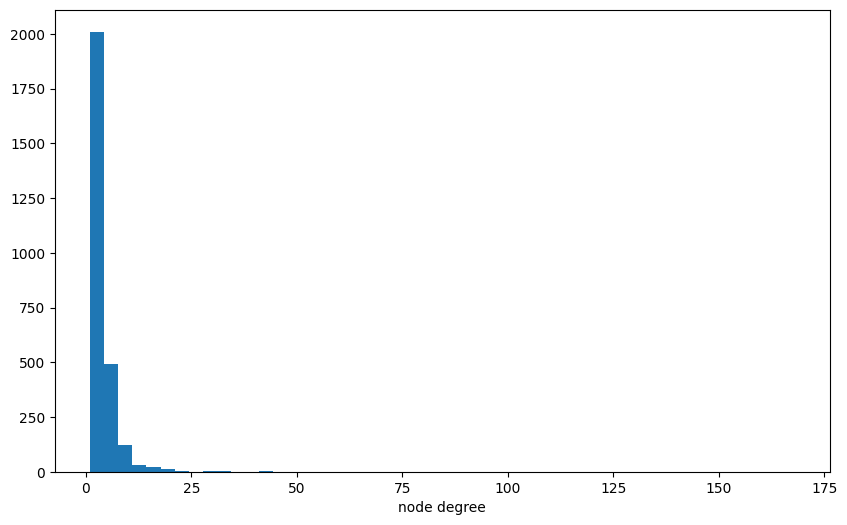

In [ ]:
G = to_networkx(data, to_undirected=True)
degrees = [val for (node, val) in G.degree()]
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))
print(len(degrees))
print(sum(degrees))
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50)
plt.xlabel("node degree")
plt.show()

Длинный "хвост" содержит высокоцитируемые публикации. Вероятно, это как самая ценная часть коллекции, так и наиболее информативные объекты в датасете.

Теперь визуализируем датасет целиком и отметим, где располагаются 10 наиболее цитируемых работ (жёлтые точки). Как видите, они ожидаемо находятся в центре.

threshold 0.011821204285186553


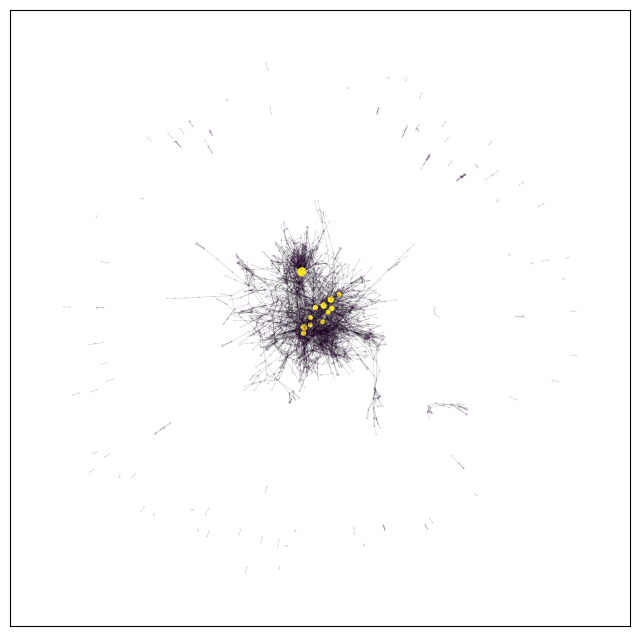

In [ ]:
G = to_networkx(data, to_undirected=True)
pos = nx.spring_layout(G, seed=42)
cent = nx.degree_centrality(G)
node_size = list(map(lambda x: x * 500, cent.values()))
cent_array = np.array(list(cent.values()))
threshold = sorted(cent_array, reverse=True)[10]
print("threshold", threshold)
cent_bin = np.where(cent_array >= threshold, 1, 0.1)
plt.figure(figsize=(8, 8))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                               node_color=cent_bin,
                               nodelist=list(cent.keys()),
                               alpha=cent_bin)
edges = nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.3)
plt.show()

Давайте посмотрим, как распределены сами классы.

In [ ]:
label_dict = {
    0: "Theory",
    1: "Reinforcement_Learning",
    2: "Genetic_Algorithms",
    3: "Neural_Networks",
    4: "Probabilistic_Methods",
    5: "Case_Based",
    6: "Rule_Learning"}
data.y[:10]

tensor([3, 4, 4, 0, 3, 2, 0, 3, 3, 2])

{3: 818, 4: 426, 0: 351, 2: 418, 1: 217, 5: 298, 6: 180}


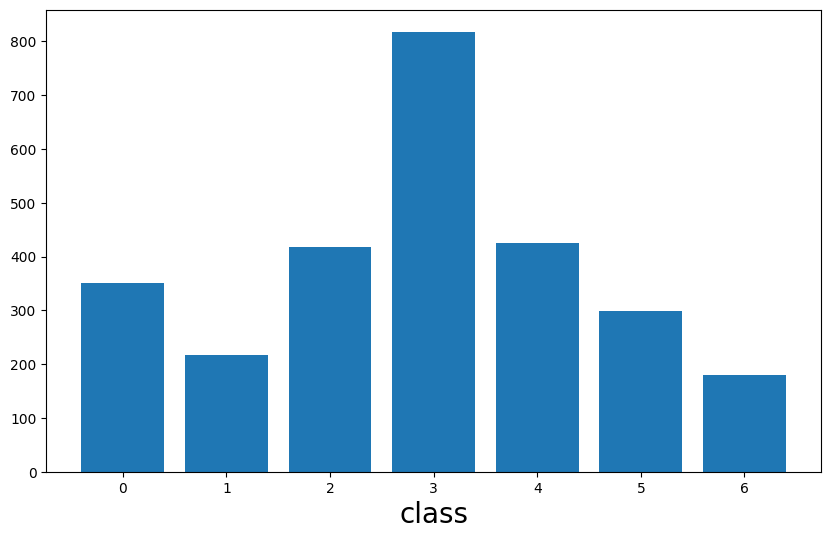

In [ ]:
import collections

counter = collections.Counter(data.y.numpy())
counter = dict(counter)
print(counter)
count = [x[1] for x in sorted(counter.items())]
plt.figure(figsize=(10, 6))
plt.bar(range(7), count)
plt.xlabel("class", size=20)
plt.show()

Ожидаемо наблюдаем дисбаланс, что намекает на необходимость аккуратного семплирования данных во время обучения.

Давайте посмотрим, как данные расположены друг относительно друга (насколько это возможно в 2D).

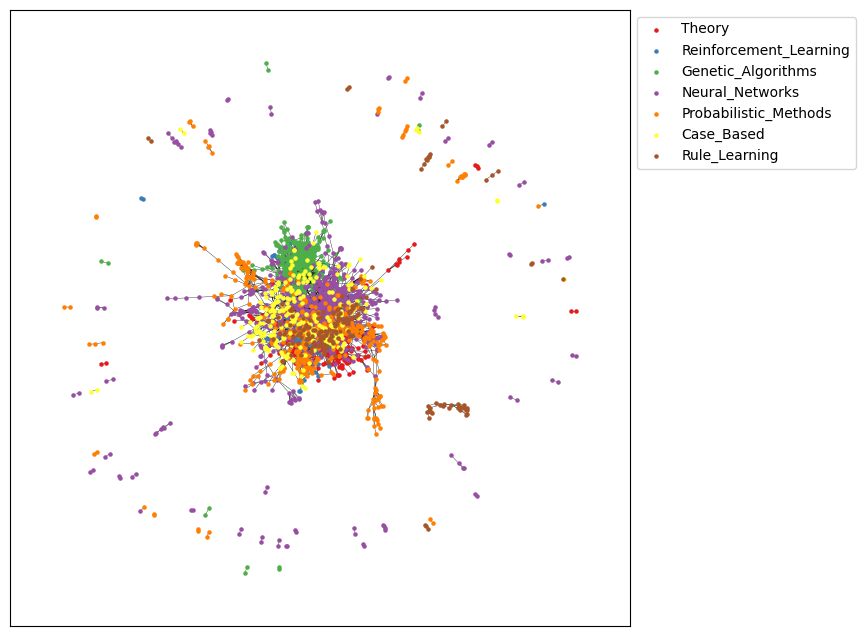

In [ ]:
G = to_networkx(data, to_undirected=True)
node_color = []
nodelist = [[], [], [], [], [], [], []]
colorlist = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#ffff33", "#a65628"]
labels = data.y
for n, i in enumerate(labels):
    node_color.append(colorlist[i])
    nodelist[i].append(n)
pos = nx.spring_layout(G, seed = 42)
plt.figure(figsize = (8, 8))
labellist = list(label_dict.values())
for num, i in enumerate(zip(nodelist, labellist)):
    n, l = i[0], i[1]
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_size = 5, node_color = colorlist[num], label=l)
nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

**Обучение модели**

Посмотрим, как распределены данные для обучения, валидации и теста.

In [ ]:
print(f"Number of training nodes: {data.train_mask.sum()}")
print(f"Number of validation nodes: {data.val_mask.sum()}")
print(f"Number of test nodes: {data.test_mask.sum()}")

Number of training nodes: 140
Number of validation nodes: 500
Number of test nodes: 1000


Убедимся, что баланс в данных соблюдён.

In [ ]:
split_type_array = np.zeros(data.num_nodes)
split_type_array[np.where(data.train_mask == True)[0]] = 1
split_type_array[np.where(data.val_mask == True)[0]] = 2
split_type_array[np.where(data.test_mask == True)[0]] = 3

Training {3: 20, 4: 20, 0: 20, 2: 20, 1: 20, 5: 20, 6: 20}
Validation {4: 81, 3: 158, 0: 61, 6: 29, 1: 36, 2: 78, 5: 57}
Test {3: 319, 2: 144, 0: 130, 1: 91, 5: 103, 4: 149, 6: 64}


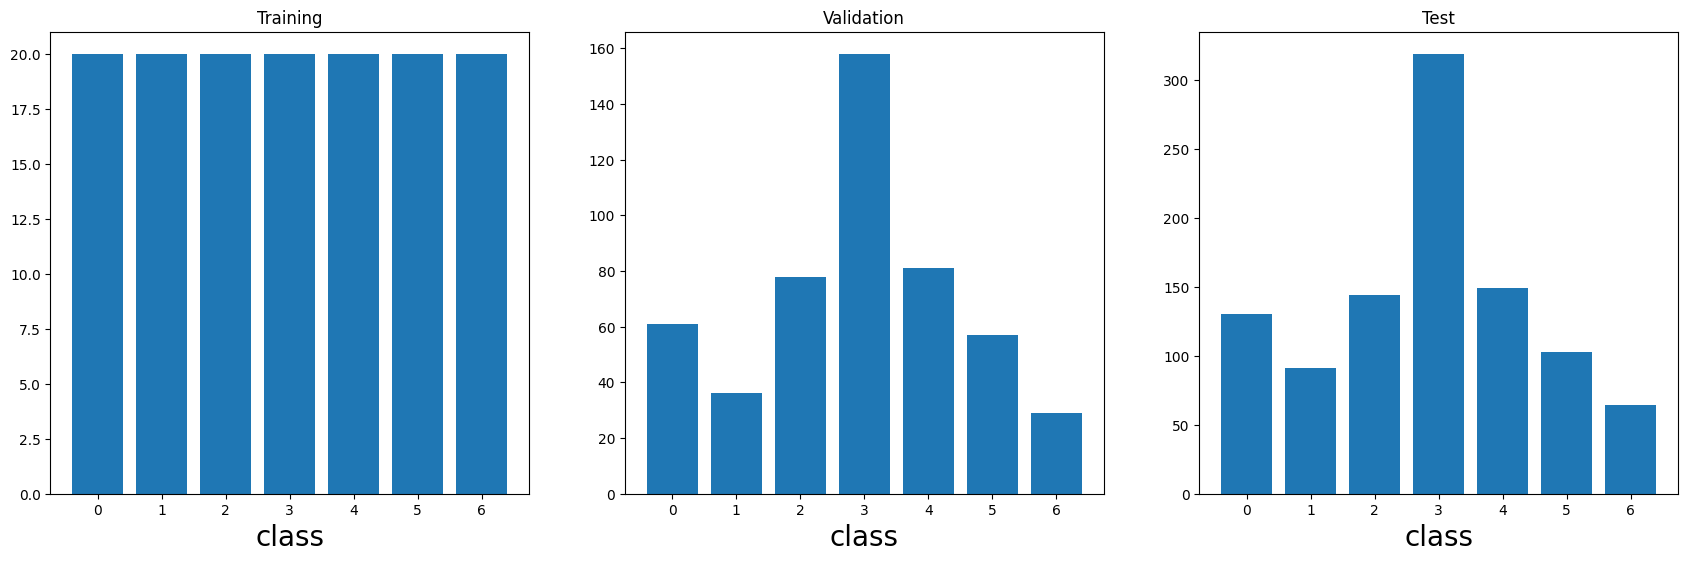

In [ ]:
titles = ["Training", "Validation", "Test"]
fig, axes = plt.subplots(ncols=3, figsize=(21, 6))
for i in range(3):
    counter = collections.Counter(data.y.numpy()[np.where(split_type_array == i + 1)[0]])
    counter = dict(counter)
    print(titles[i], counter)
    count = [x[1] for x in sorted(counter.items())]
    axes[i].bar(range(7), count)
    axes[i].set_xlabel("class", size=20)
    axes[i].set_title(titles[i])
plt.show()

Создадим и инициализируем модель и оптимизатор.
Сделаем размер скрытого слоя, скажем, равным 8, и поставим 3 головы внимания (фактически вместо одной внутренней нейросети для внимания у нас будет 3, которые смогут выучить различные особенности данных).

In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GATConv


class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads):
        super().__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads, dropout=0.6)
        # On the Pubmed dataset, use `heads` output heads in `conv2`.
        self.conv2 = GATConv(hidden_channels * heads, out_channels, heads=1,
                             concat=False, dropout=0.6)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x


model = GAT(in_channels = dataset.num_features, hidden_channels = 8, out_channels = dataset.num_classes,
            heads=8).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
data = data.to(device)

Определим функции для обучения и валидации. Обучим сеть.

In [ ]:
from torch_geometric.logging import log


def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return float(loss)


@torch.no_grad()
def test():
    model.eval()
    pred = model(data.x, data.edge_index).argmax(dim=-1)

    accs = []
    for mask in [data.train_mask, data.val_mask, data.test_mask]:
        accs.append(int((pred[mask] == data.y[mask]).sum()) / int(mask.sum()))
    return accs


best_val_acc = final_test_acc = 0
val_acc_list = []
train_acc_list = []
for epoch in range(1, 200 + 1):

    loss = train()
    train_acc, val_acc, tmp_test_acc = test()
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    log(Epoch=epoch, Loss=loss, Train=train_acc, Val=val_acc, Test=test_acc)

Epoch: 001, Loss: 1.9452, Train: 0.2071, Val: 0.1500, Test: 0.1500
Epoch: 002, Loss: 1.9413, Train: 0.3857, Val: 0.2360, Test: 0.2610
Epoch: 003, Loss: 1.9323, Train: 0.5571, Val: 0.3240, Test: 0.3530
Epoch: 004, Loss: 1.9256, Train: 0.6500, Val: 0.3600, Test: 0.3960
Epoch: 005, Loss: 1.9219, Train: 0.7071, Val: 0.4300, Test: 0.4740
Epoch: 006, Loss: 1.9133, Train: 0.7929, Val: 0.4800, Test: 0.5210
Epoch: 007, Loss: 1.9091, Train: 0.8071, Val: 0.4900, Test: 0.5410
Epoch: 008, Loss: 1.8954, Train: 0.8214, Val: 0.5220, Test: 0.5670
Epoch: 009, Loss: 1.8958, Train: 0.8643, Val: 0.5700, Test: 0.6160
Epoch: 010, Loss: 1.8905, Train: 0.8857, Val: 0.6100, Test: 0.6560
Epoch: 011, Loss: 1.8820, Train: 0.9000, Val: 0.6480, Test: 0.6950
Epoch: 012, Loss: 1.8718, Train: 0.9143, Val: 0.6980, Test: 0.7240
Epoch: 013, Loss: 1.8592, Train: 0.9429, Val: 0.7240, Test: 0.7490
Epoch: 014, Loss: 1.8581, Train: 0.9643, Val: 0.7300, Test: 0.7690
Epoch: 015, Loss: 1.8529, Train: 0.9643, Val: 0.7420, Test: 0.

In [ ]:
print (best_val_acc)

0.812


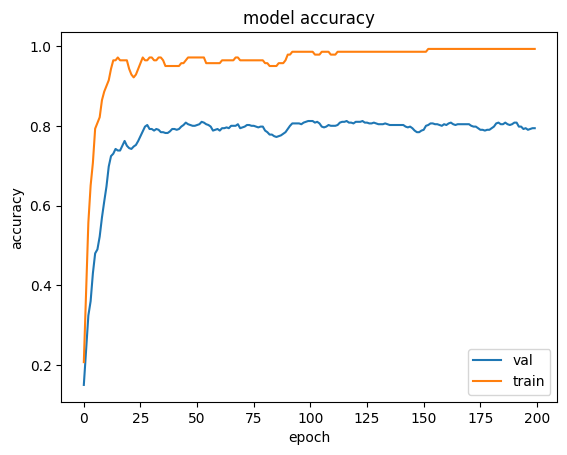

In [ ]:
from matplotlib import pyplot as plt


plt.plot(val_acc_list, label = "val")
plt.plot(train_acc_list, label = "train")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

Данные, использовавшиеся для обучения, были сбалансированы, и мы могли использовать точность в качестве метрики. В данных для валидации и тестирования присутствует дисбаланс, поэтому используем `classification_report` из библиотеки Sklearn.

In [ ]:
from sklearn.metrics import classification_report

with torch.no_grad():
    model.eval()
    pred = model(data.x, data.edge_index).argmax(dim=-1)

y_true_val = data.y[data.val_mask].cpu().numpy()
y_true_test = data.y[data.test_mask].cpu().numpy()
y_pred_val = pred[data.val_mask].cpu().numpy()
y_pred_test = pred[data.test_mask].cpu().numpy()

print(classification_report(y_true_val, y_pred_val,target_names=label_dict.values()))
print(classification_report(y_true_test, y_pred_test, target_names=label_dict.values()))

                        precision    recall  f1-score   support

                Theory       0.57      0.77      0.66        61
Reinforcement_Learning       0.70      0.86      0.78        36
    Genetic_Algorithms       0.91      0.99      0.94        78
       Neural_Networks       0.93      0.67      0.78       158
 Probabilistic_Methods       0.77      0.85      0.81        81
            Case_Based       0.87      0.79      0.83        57
         Rule_Learning       0.67      0.76      0.71        29

              accuracy                           0.79       500
             macro avg       0.77      0.81      0.79       500
          weighted avg       0.82      0.79      0.80       500

                        precision    recall  f1-score   support

                Theory       0.60      0.81      0.69       130
Reinforcement_Learning       0.78      0.88      0.83        91
    Genetic_Algorithms       0.90      0.92      0.91       144
       Neural_Networks       0.94   

Полученный результат можно улучшить. Здесь мы не будем развивать процесс выбивания более высокого `f1-score` и предлагаем читателю поэкспериментировать со слоями и гиперпараметрами.

#Заключение

Мы коротко познакомились с особенностями представления и обработки неевклидовых данных. В этом нам помогают объединенные усилия учёных и разработчиков со всего мира, вносящих вклад в развитие графовых фреймворков, библиотек дескрипторов и многого другого.

Многое осталось за скобками этого руководства. И особенности представления, и обработки гетерогенных графов, и дескрипторы графовых данных, как и построение более сложных сетей и особенности их обучения.

Обо всём этом мы постараемся рассказать в другой раз.

Сейчас же любопытным читателям мы можем порекомендовать для изучения:
* [[course] 🎓 CS224W: Machine Learning with Graphs](https://web.stanford.edu/class/cs224w/)
* [[doc] 🛠️ Pytorch Geometrics: Colab Notebooks and Video Tutorials](https://pytorch-geometric.readthedocs.io/en/latest/get_started/colabs.html)


В обзор вошли материалы из следующих источников:

* [[arxiv] 🎓 Representation Learning on Graphs: Methods and Applications](https://arxiv.org/pdf/1709.05584.pdf)
* [[doc] 🛠️ PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/)
* [[wiki] 📚 Adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix)
* [[doc] 🛠️ Drawing — basic functionality for visualizing graphs](https://networkx.org/documentation/networkx-1.10/reference/drawing.html)
* [[arxiv] 🎓 Semi-Supervised Classification with Graph Convolutional Networks](https://arxiv.org/abs/1609.02907).
* [[doc] 🛠️ GNN Cheatsheet](https://pytorch-geometric.readthedocs.io/en/latest/notes/cheatsheet.html)
* [[blog] ✏️ 3D ML. Часть 5: Свертки на графах](https://habr.com/ru/companies/itmai/articles/533746/)
* [[blog] ✏️ Введение в графовые нейросети с механизмом самовнимания на примере PyTorch Geometrics](https://habr.com/ru/companies/skillfactory/articles/661933/)
* [[article] 🎓 GAT-LI: a graph attention network based learning and interpreting method for functional brain network classification](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-021-04295-1)